# Random Weights

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager
rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':13})
rc('text', usetex=True)
import pandas as pd
import numpy as np

from statistics import load

def plot(ax, frame, cell_type, legend=False):
    if 'Spatially' in cell_type:
        opps = load.spatial(frame, cell_type.lower())
    else:
        opps = load.spectral(frame, cell_type.lower())
    retina2 = opps[opps['layer'] == 'retina_relu2']
    ventral0 = opps[opps['layer'] == 'ventral_relu0']
    ventral1 = opps[opps['layer'] == 'ventral_relu1']

    ax.plot(retina2['n_bn'], retina2['mean_rel_amount'], label='Retina2', linestyle=':')
    ax.fill_between(
        retina2['n_bn'],
        retina2['mean_rel_amount'] + retina2['std_rel_amount'],
        retina2['mean_rel_amount'] - retina2['std_rel_amount'],
        alpha=0.1
    )
    
    ax.plot(ventral0['n_bn'], ventral0['mean_rel_amount'], label='Ventral1', linestyle='--')
    ax.fill_between(
        ventral0['n_bn'],
        ventral0['mean_rel_amount'] + ventral0['std_rel_amount'],
        ventral0['mean_rel_amount'] - ventral0['std_rel_amount'],
        alpha=0.1
    )
    
    ax.plot(ventral1['n_bn'], ventral1['mean_rel_amount'], label='Ventral2', linestyle='-.')
    ax.fill_between(
        ventral1['n_bn'],
        ventral1['mean_rel_amount'] + ventral1['std_rel_amount'],
        ventral1['mean_rel_amount'] - ventral1['std_rel_amount'],
        alpha=0.1
    )
    
    if legend:
        ax.legend(frameon=False)

    if 'Spatially' in cell_type:
        ax.set_title(cell_type.replace('Spatially ', ''), pad=25)
    
    if cell_type == 'Spatially Opponent':
        ax.set_ylabel('Spatially', labelpad=25, fontsize='large')
    
    if cell_type == 'Spectrally Opponent':
        ax.set_ylabel('Spectrally', labelpad=25, fontsize='large')

    ax.set_xlim(1, 32)
    ax.set_ylim(0, 1)
    
    plt.draw()
    labels = ax.get_yticklabels()
    if len(labels) > 0:
        labels[-1] = ""
        ax.set_yticklabels(labels)

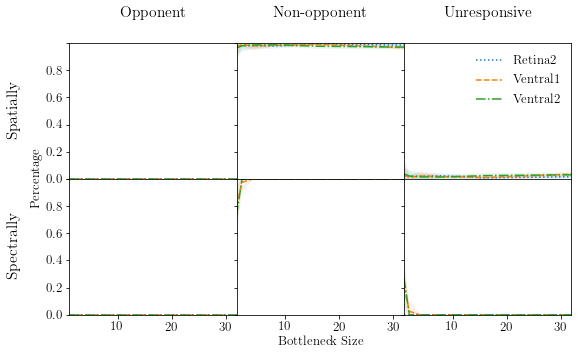

In [10]:
cell_types = ['Opponent', 'Non-opponent', 'Unresponsive']

fig, axs = plt.subplots(2, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})
fig.set_size_inches(9, 5)

fig.add_subplot(111, frameon=False)

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage')

frames = ['logs/spatial-random.pd', 'logs/devalois-random.pd']

for i, opp_type in enumerate(['Spatially', 'Spectrally']):
    frame = pd.read_pickle(frames[i])
    
    for c, cell_type in enumerate(cell_types):
        plot(axs[i, c], frame, f'{opp_type} {cell_type}', opp_type == 'Spatially' and cell_type == 'Unresponsive')

plt.savefig('figures/opponency_random.pdf', bbox_inches='tight')